In [6]:
# Import the libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

In [7]:
#Importing dataset
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [8]:
#Checking dimensions of train dataset
df.shape

(8425, 23)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [19]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [20]:
df['MinTemp'].fillna(value=df['MinTemp'].mean(),inplace=True)
df['MaxTemp'].fillna(value=df['MaxTemp'].mean(),inplace=True)
df['Rainfall'].fillna(value=df['Rainfall'].mean(),inplace=True)
df['WindGustDir'].fillna(value=df['WindGustDir'].mode(),inplace=True)
df['WindGustSpeed'].fillna(value=df['WindGustSpeed'].mean(),inplace=True)
df['WindDir9am'].fillna(value=df['WindDir9am'].mode(),inplace=True)
df['WindDir3pm'].fillna(value=df['WindDir3pm'].mode(),inplace=True)
df['WindSpeed9am'].fillna(value=df['WindSpeed9am'].mean(),inplace=True)
df['WindSpeed3pm'].fillna(value=df['WindSpeed3pm'].mean(),inplace=True)
df['Humidity9am'].fillna(value=df['Humidity9am'].mean(),inplace=True)
df['Humidity3pm'].fillna(value=df['Humidity3pm'].mean(),inplace=True)
df['Pressure9am'].fillna(value=df['Pressure9am'].mean(),inplace=True)
df['Pressure3pm'].fillna(value=df['Pressure3pm'].mean(),inplace=True)
df['Cloud9am'].fillna(value=df['Cloud9am'].mean(),inplace=True)
df['Cloud3pm'].fillna(value=df['Cloud3pm'].mean(),inplace=True)
df['Temp9am'].fillna(value=df['Temp9am'].mean(),inplace=True)
df['Temp3pm'].fillna(value=df['Temp3pm'].mean(),inplace=True)
df['RainToday'].fillna(value=df['RainToday'].mode(),inplace=True)
df['RainTomorrow'].fillna(value=df['RainTomorrow'].mode(),inplace=True)

In [21]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed       0
WindDir9am        829
WindDir3pm        308
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday         240
RainTomorrow      239
dtype: int64

In [22]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.717522,0.087684,0.348641,0.081292,0.230058,0.136872,0.178349,-0.130731,0.079048,-0.429432,-0.422991,0.091604,0.038414,0.887119,0.685520
MaxTemp,0.717522,1.000000,-0.087451,0.424724,0.523783,0.139998,0.013314,0.088172,-0.390976,-0.421879,-0.325721,-0.403258,-0.253968,-0.250132,0.866039,0.974506
Rainfall,0.087684,-0.087451,1.000000,0.042902,-0.205707,0.086000,0.050631,0.024791,0.228800,0.235444,-0.072668,-0.033649,0.185444,0.150760,-0.007083,-0.090687
Evaporation,0.348641,0.424724,0.042902,1.000000,0.340893,0.173323,0.138257,0.141953,-0.286876,-0.221227,-0.218161,-0.233386,-0.076393,-0.131749,0.405467,0.414148
Sunshine,0.081292,0.523783,-0.205707,0.340893,1.000000,-0.018627,-0.025186,0.044974,-0.512043,-0.630492,0.028666,-0.047082,-0.670529,-0.685612,0.348503,0.546025
WindGustSpeed,0.230058,0.139998,0.086000,0.173323,-0.018627,1.000000,0.600198,0.634939,-0.269593,-0.091860,-0.407139,-0.372651,0.023313,0.078631,0.202298,0.102199
WindSpeed9am,0.136872,0.013314,0.050631,0.138257,-0.025186,0.600198,1.000000,0.560660,-0.358391,-0.110587,-0.174679,-0.138454,-0.000549,0.058198,0.109798,-0.002606
WindSpeed3pm,0.178349,0.088172,0.024791,0.141953,0.044974,0.634939,0.560660,1.000000,-0.250953,-0.091004,-0.251697,-0.207544,0.005061,0.003295,0.184188,0.066087
Humidity9am,-0.130731,-0.390976,0.228800,-0.286876,-0.512043,-0.269593,-0.358391,-0.250953,1.000000,0.633291,0.142374,0.173415,0.404742,0.296862,-0.378344,-0.382401
Humidity3pm,0.079048,-0.421879,0.235444,-0.221227,-0.630492,-0.091860,-0.110587,-0.091004,0.633291,1.000000,0.001629,0.070369,0.424348,0.439965,-0.130414,-0.491485


<Axes: >

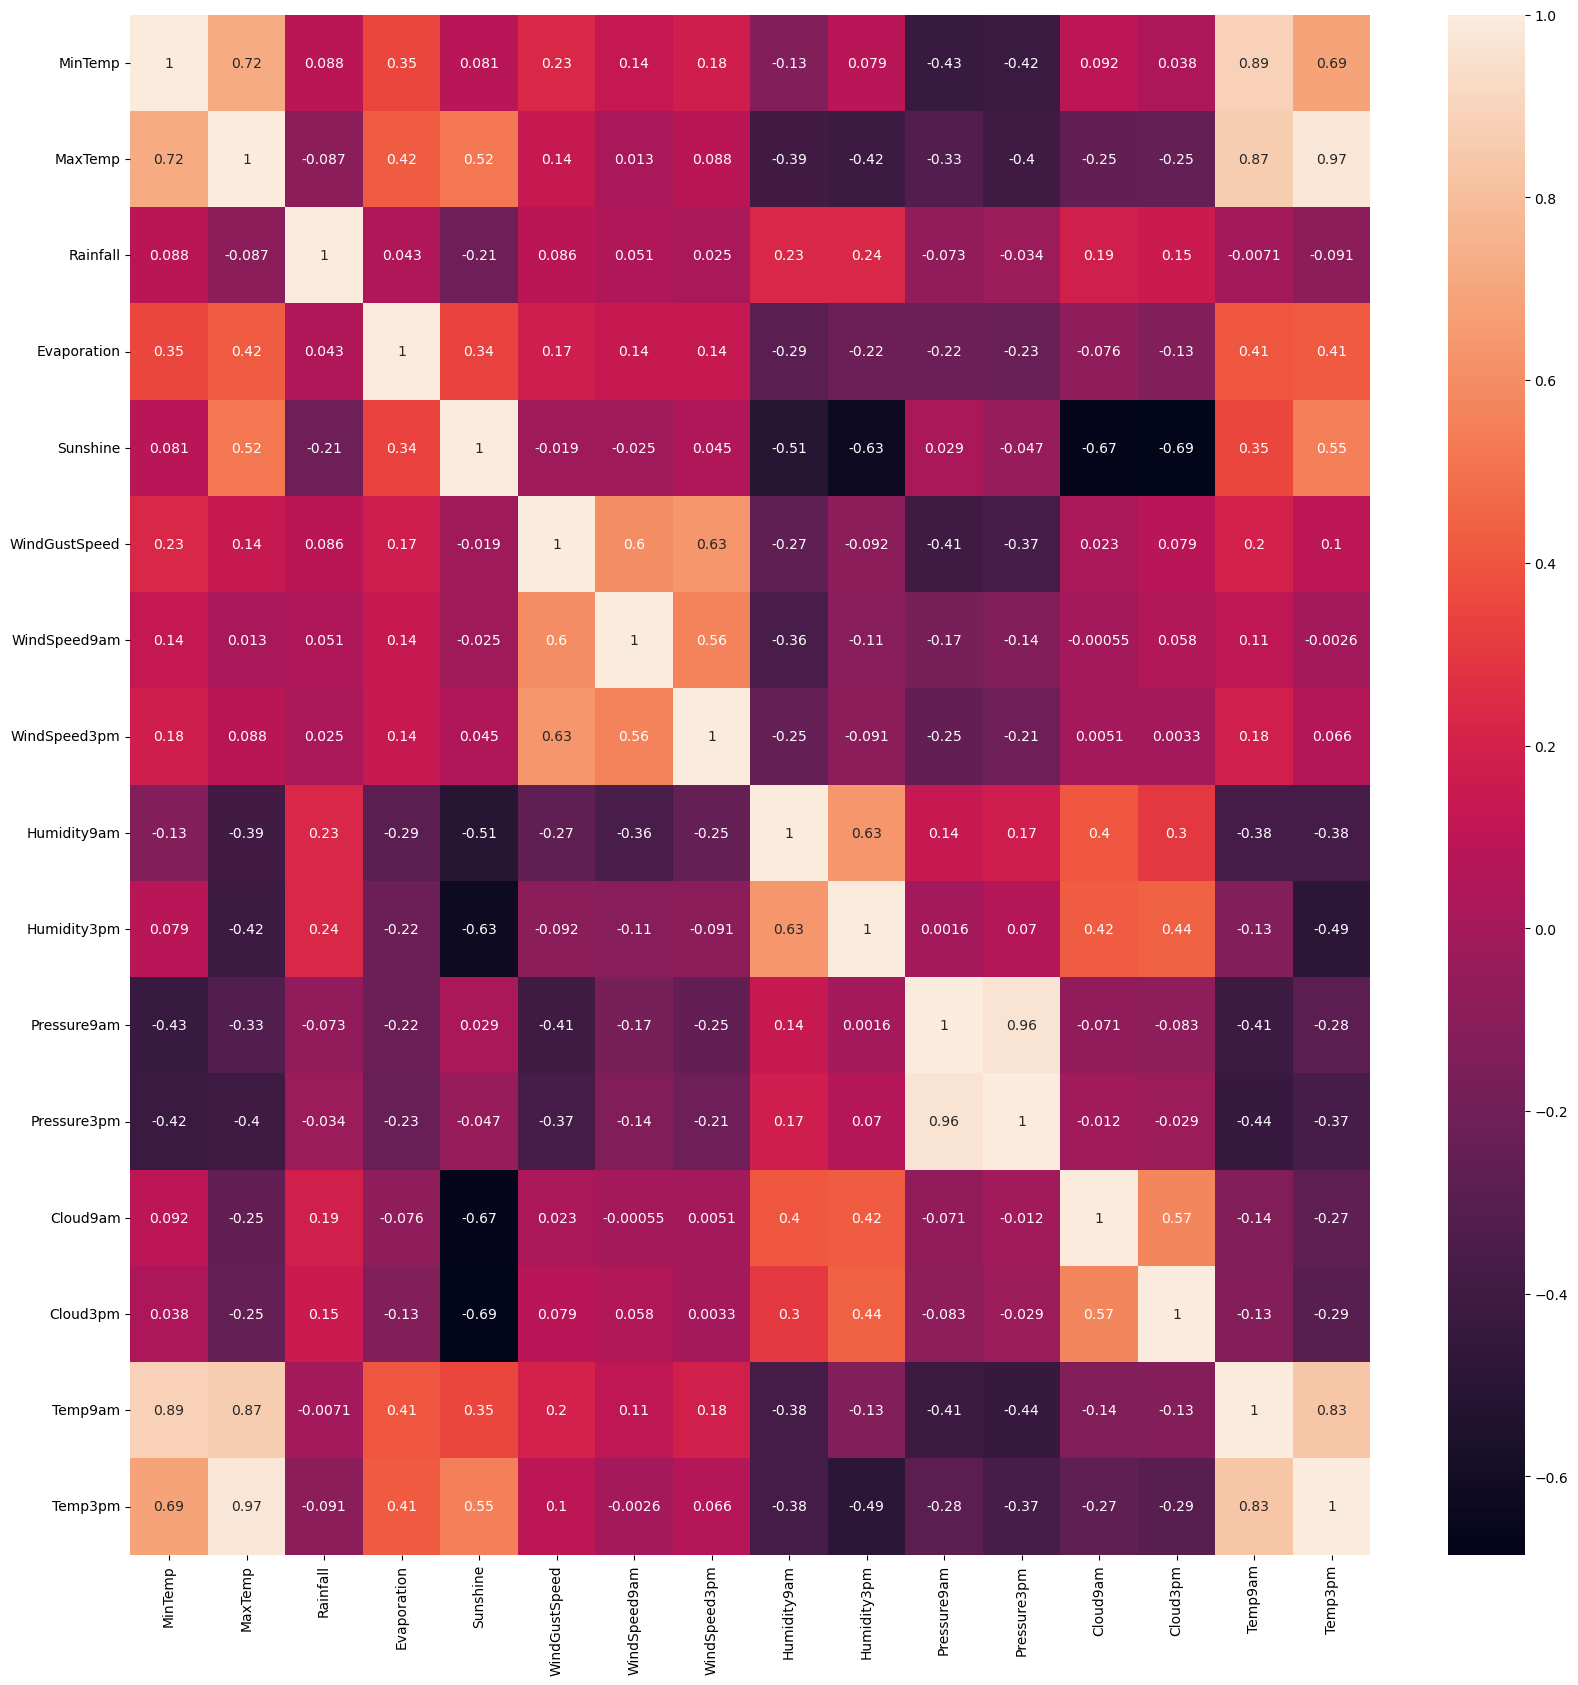

In [23]:
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

In [24]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [13]:
#Transforming Categorical Variables

In [25]:
df_proc = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_proc

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2008-12-01,Albury,13.4,22.900000,0.6,NaN,NaN,44.000000,20.0,24.0,...,0,0,0,0,0,0,0,0,1,0
1,2008-12-02,Albury,7.4,25.100000,0.0,NaN,NaN,44.000000,4.0,22.0,...,0,0,0,0,0,0,0,0,0,1
2,2008-12-03,Albury,12.9,25.700000,0.0,NaN,NaN,46.000000,19.0,26.0,...,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,Albury,9.2,28.000000,0.0,NaN,NaN,24.000000,11.0,9.0,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,Albury,17.5,32.300000,1.0,NaN,NaN,41.000000,7.0,20.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.400000,0.0,NaN,NaN,31.000000,13.0,11.0,...,0,0,0,0,0,0,0,0,0,0
8421,2017-06-22,Uluru,3.6,25.300000,0.0,NaN,NaN,22.000000,13.0,9.0,...,0,0,0,0,0,0,0,0,0,0
8422,2017-06-23,Uluru,5.4,26.900000,0.0,NaN,NaN,37.000000,9.0,9.0,...,0,0,0,0,0,0,0,0,1,0
8423,2017-06-24,Uluru,7.8,27.000000,0.0,NaN,NaN,28.000000,13.0,7.0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df_proc.replace(['No', 'Yes'], [0,1], inplace=True)
df_proc[['Date','RainTomorrow']]

,Date,RainTomorrow
0,2008-12-01,0.0
1,2008-12-02,0.0
2,2008-12-03,0.0
3,2008-12-04,0.0
4,2008-12-05,0.0
...,...,...
8420,2017-06-21,0.0
8421,2017-06-22,0.0
8422,2017-06-23,0.0
8423,2017-06-24,0.0


In [ ]:
df.corr()